<a href="https://colab.research.google.com/github/RubenSierraSerrano/Practica4/blob/main/Pr%C3%A1ctica4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 4: Algoritmos genéticos
Grupo 2

Instalamos la librerías necesarias:

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install deap
!pip install scipy
!pip install scope

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scope: filename=scope-0.1.1-py3-none-any.whl size=8355 sha256=212c6622bcc68c3f451ee17667c20d2a2ef9fccd8555d52e94e00805d07349f5
  Stored in directory: /root/.cache/pip/wheels/de/d5/3b/956de836dc8987083eb18c8e88c20a6d18767ca1a81119defd
Successfully built scope


Importamos las librerías necesarias:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from deap import base, creator, tools, algorithms
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Problema a resolver:

$z = f(x,y) = 3(1-x)^2 \cdot e^{-(x)^2-(y+1)^2}-10 \cdot (\frac{x}{5}-x^3-y^5) \cdot e^{-x^2-y^2} - \frac {1}{3} \cdot e^{-(x+1)^2-y^2}$

En el dominio:
> ${x,y} \in [-100, 100]$



In [ ]:
# Vamos a fijar una semilla
random.seed(0)
# Generamos los números pseudoaleatorios
x = [random.uniform(-100, 100) for i in range(10)]
y = [random.uniform(-100, 100) for i in range(10)]
print('x = ', x)
print('y = ', y)

x =  [68.88437030500961, 51.590880588060486, -15.885683833830996, -48.21664994140733, 2.254944273721705, -19.01317250991714, 56.75971780695451, -39.33745478421451, -4.680609169528836, 16.676407891006235]
y =  [81.62257703906704, 0.9373711634780477, -43.63243112005924, 51.16084083144477, 23.67379933506632, -49.898731727511894, 81.94925119364802, 96.55709520753061, 62.04344719931791, 80.43319008791653]


Podemos observar que todas las soluciones son válidas al encontrarse dentro del intervalo de nuestro dominio.

Vamos a definir nuestra función:

In [ ]:
def func(x, y):
    f = 3 * (1 - x)**2 * np.exp(-(x)**2 - (y + 1)**2) - 10 * ((x / 5) - x**3 - y**5) * np.exp(-x**2 - y**2) -(1/3) * np.exp(-(x + 1)**2 - y**2)
    return f

Vamos a visualizar nuestra función:

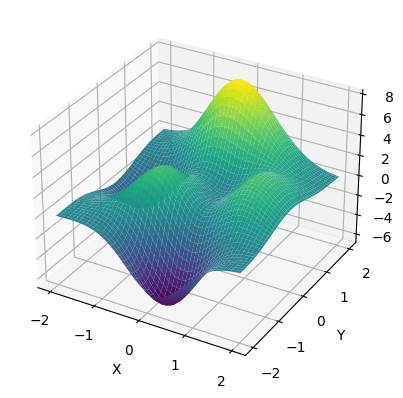

In [ ]:
# Genera datos para x y y
axis_x = np.linspace(-2, 2, 100)
axis_y = np.linspace(-2, 2, 100)
axis_x, axis_y = np.meshgrid(axis_x, axis_y)

# Evalúa la función en cada punto (axis_x, axis_y)
axis_z = func(axis_x, axis_y)

# Crea la figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grafica la superficie
ax.plot_surface(axis_x, axis_y, axis_z, cmap='viridis')

# Etiqueta los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Muestra la gráfica
plt.show()

Procedemos a crear los objetos necesarios para resolver nuestro problema de optimización:

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

Creamos el tipo de `individuo` que emplearemos para resolver nuestro problema de optimización:

In [ ]:
creator.create("Individual", list, fitness=creator.FitnessMax)

Vamos a hacer uso de la caja de herramientas o `toolbox`:

In [ ]:
toolbox = base.Toolbox()

Vamos a usarla para generar los genes:

In [ ]:
# Generación de genes
toolbox.register("attr_uniform", random.uniform, -100, 100)

Nos aseguramos de generar un número dentro de nuestro dominio:

In [ ]:
toolbox.attr_uniform()

-37.970486136133474

Creamos el individuo completo llamando a la función que genera cada uno de los individuos tantas veces como variables independientes tengamos:

In [ ]:
# Generación de inviduos
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)

Ejemplo de generación de individuo:

In [ ]:
individuo = toolbox.individual()
individuo

[45.96634965202574, 79.7676575935987]

Vamos a crear una población:

In [ ]:
# Generación de población
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 32)

Ejemplo de población:

In [ ]:
poblacion = toolbox.population()
print(poblacion)

[[36.79678638308826, -5.571456909457325], [-79.85975838632683, -13.165632909243257], [22.177394688760316, 82.60221064757965], [93.32127355415176, -4.5980446894566], [73.061985554328, -47.90153792160812], [61.005565402604475, 9.739860767117861], [-97.19165996719622, 43.94093728079082], [-20.235291555146247, 64.96899542964661], [33.63064024637018, -99.77143613711435], [-1.284426706935065, 73.52055509855617], [-51.2178246225736, -34.95912745052199], [74.09424642173093, -61.78658169952189], [13.50214812413438, -52.27681427695596], [93.50805005802866, 60.63589385597402], [-10.406085712885925, -83.91083628949292], [-35.98907906549084, 1.5881285041147777], [86.56676484538136, -78.18843081377926], [10.253449218110248, 41.312281973377935], [9.488182265684756, 62.8933726582672], [8.056721394064795, 92.76770919476019], [20.63712559227659, 17.52341283508727], [-11.00219474489677, 19.257372316621257], [-23.019770805467914, 15.130202832977702], [-41.934099519448395, -62.121734289128774], [-62.654094

Definimos nuestra función objetivo de maximización:

In [ ]:
def funcion_objetivo(x):
    # Restricciones de dominio
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,  # Valor inválido, la función devuelve un solo valor

    # Evaluar la función objetivo
    res = func(x[0], x[1])
    return res,

De tal forma que si un individuo no cumple con nuestro dominio, es descartada (devolvemos -1), al tratarse de un problema de maximización, este resultado penaliza completamente al individuo, haciendo que no participe en la **selección** y **mutación**.

Registramos la **función de fitness**:

In [ ]:
toolbox.register("evaluate", funcion_objetivo)

Ejemplo:

In [ ]:
funcion_objetivo(individuo)

(0.0,)

El siguiente paso consiste en introducir nuestros **operadores genéticos**:

  1) Cruce: Empleamos cruce en un punto:

In [ ]:
toolbox.register("mate", tools.cxOnePoint)

  2) Mutación: Empleamos la mutación gaussiana (con una media de y una desviación estándar de )

In [ ]:
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

  3) Selección: Vamos a empezar usando la selección por torneo, fijamos un tamaño igual a 3:

In [ ]:
toolbox.register("select", tools.selTournament, tournsize=3)

Montamos nuestro **algoritmo genético**:

Primero de todo vamos a definir una semilla para que siempre obtengamos los mismos valores aleatorios:

In [ ]:
random.seed(42)

Definimos:
1.  CXPB: Probabilidad de Cruce
2.  MUTPB: Probabilidad de Mutación
3.  NGEN: Número de Generaciones

In [ ]:
CXPB, MUTPB, NGEN = 0.5, 0.3, 20

In [ ]:
pop = toolbox.population()
pop

[[27.885359691576753, -94.99784895546661],
 [-44.99413632617615, -55.35785237023545],
 [47.29424283280247, 35.33989748458225],
 [78.43591354096907, -82.61223347411678],
 [-15.61563606294591, -94.04055611238593],
 [-56.27240503927933, 1.0710576206724767],
 [-94.69280606322728, -60.2324698626703],
 [29.976887555904653, 8.98829612064334],
 [-55.911875591860664, 17.85313677518174],
 [61.88609133556534, -98.7002480643878],
 [61.163850366561576, 39.62787899764538],
 [-31.949896696401623, -68.90410003764369],
 [91.44261444135623, -32.68109097747465],
 [-81.45083132397042, -80.65672463330719],
 [69.49887326949195, 20.745206273378216],
 [61.42565465487604, 45.94635733876359],
 [7.245618290940143, 94.62315279587412],
 [-24.29312455832931, 10.408126254645396],
 [65.88093285059898, 23.703950472849215],
 [72.34138006215545, 15.470429051352411],
 [40.914367242984696, -90.83512326886756],
 [-54.42034486969063, -42.12240727957857],
 [-84.04160461527451, -53.44182272779396],
 [-79.79971411805417, -44.4

In [ ]:
# Definimos el objeto hof que almacenará el mejor individuo
# encontrado a lo largo de las generaciones del Algoritmo G.
hof = tools.HallOfFame(1)

In [ ]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
print(stats)

In [ ]:
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

In [ ]:
logbook = tools.Logbook()

In [ ]:
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)

gen	nevals	avg          	std	min          	max
0  	32    	-2.16768e-285	0  	-6.93659e-284	0  
1  	19    	0            	0  	0            	0  
2  	22    	-5.58363e-96 	3.10883e-95	-1.78676e-94 	0  
3  	18    	0            	0          	0            	0  
4  	21    	3.37958e-156 	1.88167e-155	0            	1.08147e-154
5  	18    	3.37958e-156 	1.88167e-155	0            	1.08147e-154
6  	19    	6.03271e-139 	3.35887e-138	0            	1.93047e-137
7  	21    	1.80981e-138 	5.62693e-138	0            	1.93047e-137
8  	18    	5.42944e-138 	8.67955e-138	0            	1.93047e-137
9  	16    	3.15934e-65  	1.75905e-64 	1.66484e-237 	1.01099e-63 
10 	18    	1.26374e-64  	3.34353e-64 	2.67119e-272 	1.01099e-63 
11 	26    	1.89935e-25  	1.05748e-24 	1.93047e-137 	6.07776e-24 
12 	21    	7.59735e-25  	2.01002e-24 	1.93047e-137 	6.07776e-24 
13 	22    	1.32953e-24  	2.51252e-24 	7.81067e-114 	6.07776e-24 
14 	19    	3.60869e-24  	2.98495e-24 	1.94341e-128 	6.07776e-24 
15 	20    	5.12812e-24  	2.20676e-

In [ ]:
def main():
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

gen	nevals	avg         	std         	min          	max        
0  	32    	2.05256e-125	1.14282e-124	-4.39982e-279	6.5682e-124
1  	21    	6.4696e-116 	3.30597e-115	0            	1.89779e-114
2  	17    	0.00945274  	0.0526307   	0            	0.302488    
3  	26    	0.0189055   	0.0732206   	-1.39603e-10 	0.302488    
4  	21    	0.034194    	0.109677    	-1.39603e-10 	0.489234    
5  	15    	0.126087    	0.295857    	-2.27238e-10 	1.47287     
6  	16    	0.392823    	0.471025    	-2.06024e-14 	2.0546      
7  	18    	0.659131    	0.611106    	-6.13396e-06 	2.0546      
8  	26    	1.18731     	0.786274    	0.302488     	2.0546      
9  	20    	1.59949     	0.732448    	-0.38794     	2.0546      
10 	13    	2.04862     	0.0332895   	1.86327      	2.0546      
11 	21    	2.0546      	0           	2.0546       	2.0546      
12 	16    	1.99039     	0.357485    	1.71188e-20  	2.0546      
13 	15    	2.0546      	0           	2.0546       	2.0546      
14 	15    	2.0546      	0           	2.054

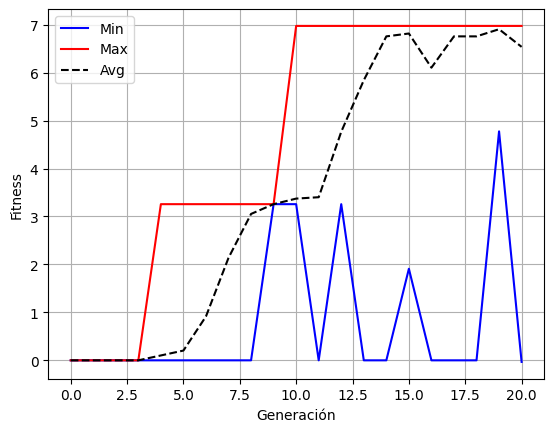

In [ ]:
def plot_evolucion(log):
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")

    # Agrega la información de los mejores individuos
    best_individuals = log.select("best")
    ax1.plot(gen, best_individuals, "-g")

    ax1.set_xlabel("Generación")
    ax1.set_ylabel("Fitness")
    ax1.legend(["Min", "Max", "Avg"], loc="upper left")
    plt.grid(True)
    plt.show()

# Inicializamos la lista de las soluciones. Almacenaremos el fitness
# del mejor individuo de cada intento del algoritmo genético
lista_mejores = list()

# Lanzamos el algoritmo 20 veces
for i in range(20):
    # Fijamos la semilla
    random.seed(i)
    best, log = main()
    lista_mejores.append(best[0].fitness.values)

    # Muestra el mejor individuo de cada intento
    print(f"Intento {i + 1}, Mejor Individuo: {best[0].fitness.values}")

# Mostramos los resultados. Al terminar el bucle, calculamos
# la media y el mejor resultado de todos los intentos
media = np.mean(lista_mejores)
mejor_total = max(lista_mejores)
print("Media: %f" % media)
print("Mejor: %f" % mejor_total)

# Representa la evolución del mejor individuo en cada generación
plot_evolucion(log)

<p align="justify">
La gráfica roja representa el máximo valor del individuo de una generación dada, la azul muestra el individio con menor valor de nuestra generación y la negra y discontinua muestra el valor numérico medio de nuestra generación.

<p align="justify">
Podemos observar que las generaciones en las que hay un cambio brusco del mínimo, el algoritmo entra en fase de exploración, es decir, busca nuevas regiones en las que buscar la solución óptima.

<p align="justify">
En la generación 10 vemos que todas las gráficas de estabilizan en el mismo valor, claro indicio de que el algoritmo ya ha convergido.


# PROBLEMA 2


La función Rastringin es una función que es normalmente empleada para evaluar algoritmos de optimización. La función esta definida como:

$$ f(x1, x2) =An + ∑[x_i^2-Acos(2\pi x_i)] $$

En este caso, tomamos $$A = 10$$
Entonces la función se queda de la siguiente manera:

$$ f(x1, x2) =10n + ∑[x_i^2-10cos(2\pi x_i)] $$

Implementamos esta función en Python y minimizarla para $$n=10$$.  
Estudiaremos la función en el intervalo siguiente:

$${x_i}\in[-5.12,5.12]$$

In [ ]:
def fun_rastrigin(x, y, A):
    result = A * 10 + (x**2 - A * np.cos(2 * np.pi * x)) + (y**2 - A * np.cos(2 * np.pi * y))
    return result

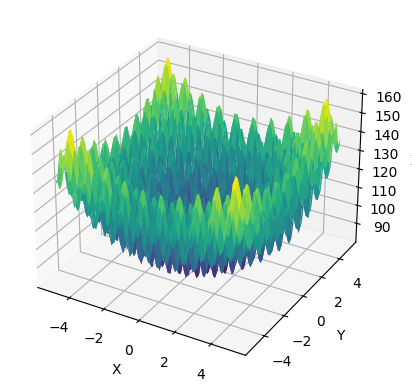

In [ ]:
# Genera datos para x y y
axis_x = np.linspace(-5.12, 5.12, 100)
axis_y = np.linspace(-5.12, 5.12, 100)
axis_x, axis_y = np.meshgrid(axis_x, axis_y)

A = 10
# Evalúa la función de Rastrigin en cada punto (axis_x, axis_y)
axis_z = fun_rastrigin(axis_x, axis_y, A)

# Crea la figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grafica la superficie
ax.plot_surface(axis_x, axis_y, axis_z, cmap='viridis')

# Etiqueta los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Muestra la gráfica
plt.show()

Graficamos las curvas de nivel de la función para visualizar mejor dónde se halla el/los mínimo(s).

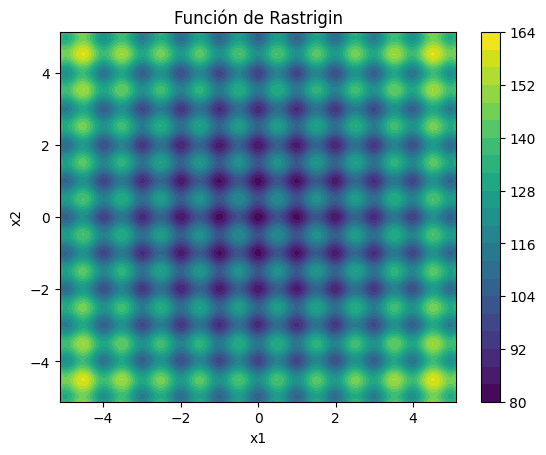

In [ ]:

x = np.linspace(-5.12,5.12,100)
y = np.linspace(-5.12,5.12,100)

xx, yy = np.meshgrid(x,y)
zz = fun_rastrigin(xx,yy,10)
plt.contourf(x, y, zz, levels=20, cmap='viridis')
plt.title("Función de Rastrigin")
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar()  # Add colorbar for reference
plt.show()

Vemos que hay varios puntos donde hay candidatos para mínimos, que son los puntos azul oscuro.  Están en el centro de la figura, lo cual tiene sentido, pues ya lo hemos visto antes en 3D.  La figura en 3D es de la forma de un cuenco y sus mínimos están en el centro.

Evaluamos nuestro algoritmo genético:

In [ ]:
# Configura la optimización con DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def evaluate(individual):
    x, y = individual
    A = 10
    result = A * 10 + (x**2 - A * np.cos(2 * np.pi * x)) + (y**2 - A * np.cos(2 * np.pi * y))
    return result,

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -5.12, 5.12)
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_float, toolbox.attr_float), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

population_size = 50
generations = 150
cxpb = 0.7
mutpb = 0.2

population = toolbox.population(n=population_size)
fitnesses = list(map(toolbox.evaluate, population))
for ind, fit in zip(population, fitnesses):
    ind.fitness.values = fit

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

# Ejecuta el algoritmo genético
population, logbook = algorithms.eaMuPlusLambda(population, toolbox, mu=population_size, lambda_=2*population_size,
                                                cxpb=cxpb, mutpb=mutpb, ngen=generations, stats=stats, halloffame=None, verbose=True)

# Extrae el mejor individuo
best_individual = tools.selBest(population, 1)[0]
best_x, best_y = best_individual

# Imprime los resultados
print("Mejor individuo:", best_individual)
print("Mejor valor de aptitud:", evaluate(best_individual)[0])

gen	nevals	avg    	min    	max    
0  	0     	118.013	87.2419	157.115
1  	88    	135.667	103.785	197.045
2  	86    	151.907	122.43 	197.045
3  	88    	180.325	131.789	263.957
4  	92    	207.387	151.215	374.17 
5  	90    	250.453	146.599	462.865
6  	94    	331.099	201.862	547.91 
7  	87    	451.455	245.988	1002.89
8  	88    	643.203	377.64 	2321.93
9  	93    	839.657	414.972	2321.93
10 	91    	1445.68	503.705	4197.93
11 	88    	2484.5 	880.087	8333.9 
12 	85    	5481.9 	1325.1 	25307.9
13 	87    	13649.6	2302.15	67978.7
14 	92    	24820  	4768.38	67978.7
15 	86    	43634.8	14100.2	137514 
16 	87    	72034.6	14689  	137528 
17 	93    	132786 	48694  	303043 
18 	90    	228161 	66570.4	972692 
19 	88    	438349 	137554 	2.80701e+06
20 	90    	696167 	203378 	3.35975e+06
21 	89    	1.16701e+06	305283 	3.35975e+06
22 	89    	1.89732e+06	847303 	4.60697e+06
23 	91    	2.74675e+06	1.17172e+06	6.18204e+06
24 	90    	3.80999e+06	2.01833e+06	1.74462e+07
25 	90    	4.69297e+06	2.85404e+06	1.74462

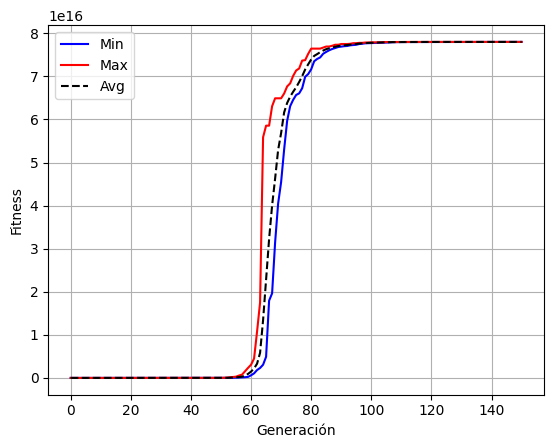

In [ ]:
plot_evolucion(logbook)

<p align="justify">
La gráfica roja representa el máximo valor del individuo de una generación dada, la azul muestra el individio con menor valor de nuestra generación y la negra y discontinua muestra el valor numérico medio de nuestra generación.

<p align="justify">
Podemos observar que las generaciones en las que hay un cambio brusco del mínimo, el algoritmo entra en fase de exploración, es decir, busca nuevas regiones en las que buscar la solución óptima.

<p align="justify">
En torno a la generación 83 vemos que todas las gráficas de estabilizan en el mismo valor, claro indicio de que el algoritmo ya ha convergido.